 https://qiita.com/Kenshi_Okada/items/7a7ddf8cda2721de1054
 https://axa.biopapyrus.jp/machine-learning/model-evaluation/nested-k-fold-cross-validation.html
 https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import interp
import math
from itertools import cycle

#for plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# for machine learning
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from collections import Counter
from sklearn.pipeline import Pipeline

# for assessment
from sklearn import metrics

# for Dimensionality reduction
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectPercentile,VarianceThreshold
import scipy.stats as sp

# fix random state
random_state = np.random.RandomState(0)

# for LOO
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# for assessment
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load our private dataset

In [2]:
# import data T2
dT2_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_FirstOrdered_T2.txt', delim_whitespace=True,header=0)
dT2_ShapeSize= pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_ShapeSize_T2.txt', sep=' ',header=0)

dT2_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

# import data GD
dGD_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_FirstOrdered_GD.txt', delim_whitespace=True,header=0)
dGD_ShapeSize = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_ShapeSize_GD.txt', delim_whitespace=True,header=0)
dGD_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGLDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

In [3]:
# check number of columns and rows
print(dT2_FirstOrdered.shape)
print(dT2_ShapeSize.shape)
print(dT2_16GLCM.shape, dT2_16GLRLM.shape, dT2_16GLSZM.shape, dT2_16NGLDM.shape, dT2_16NGTDM.shape)
print(dT2_32GLCM.shape, dT2_32GLRLM.shape, dT2_32GLSZM.shape, dT2_32NGLDM.shape, dT2_32NGTDM.shape)
print(dT2_64GLCM.shape, dT2_64GLRLM.shape, dT2_64GLSZM.shape, dT2_64NGLDM.shape, dT2_64NGTDM.shape)
print(dT2_128GLCM.shape, dT2_128GLRLM.shape, dT2_128GLSZM.shape, dT2_128NGLDM.shape, dT2_128NGTDM.shape)

# check number of columns and rows
print(dGD_FirstOrdered.shape)
print(dGD_ShapeSize.shape)
print(dGD_16GLCM.shape, dGD_16GLRLM.shape, dGD_16GLSZM.shape, dGD_16NGLDM.shape, dGD_16NGTDM.shape)
print(dGD_32GLCM.shape, dGD_32GLRLM.shape, dGD_32GLSZM.shape, dGD_32NGLDM.shape, dGD_32NGTDM.shape)
print(dGD_64GLCM.shape, dGD_64GLRLM.shape, dGD_64GLSZM.shape, dGD_64NGLDM.shape, dGD_64NGTDM.shape)
print(dGD_128GLCM.shape, dGD_128GLRLM.shape, dGD_128GLSZM.shape, dGD_128NGLDM.shape, dGD_128NGTDM.shape)

(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)


In [4]:
# change rownames
dT2_FirstOrdered.index=dT2_FirstOrdered['Dnum']
dT2_ShapeSize.index=dT2_ShapeSize['Dnum']
    
# extract data
dT2_FirstOrdered= dT2_FirstOrdered.iloc[:,2:344]
dT2_ShapeSize= dT2_ShapeSize.iloc[:,2:10]
   
# integrate data
dT2_nontxt=pd.concat([dT2_FirstOrdered, dT2_ShapeSize], axis=1)
    
# change rownames
dT2_nontxt=dT2_nontxt.rename(columns=lambda s : "dT2"+s)

print(dT2_FirstOrdered.shape)
print(dT2_ShapeSize.shape)
print(dT2_nontxt.shape)

(57, 342)
(57, 8)
(57, 350)


In [5]:
# change rownames
dGD_FirstOrdered.index=dGD_FirstOrdered['Dnum']
dGD_ShapeSize.index=dGD_ShapeSize['Dnum']
    
# extract data
dGD_FirstOrdered= dGD_FirstOrdered.iloc[:,2:344]
dGD_ShapeSize= dGD_ShapeSize.iloc[:,2:10]
   
# integrate data
dGD_nontxt=pd.concat([dGD_FirstOrdered, dGD_ShapeSize], axis=1)
    
# change rownames
dGD_nontxt=dGD_nontxt.rename(columns=lambda s : "dGD"+s)

print(dGD_FirstOrdered.shape)
print(dGD_ShapeSize.shape)
print(dGD_nontxt.shape)

(57, 342)
(57, 8)
(57, 350)


In [6]:
def make_df_dT2_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    #Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dT2" + s)
    
    return d_all

In [7]:
def make_df_dGD_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    #Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dGD" + s)
    
    return d_all

In [8]:
dT2_16_txt = make_df_dT2_txt (dT2_16GLCM, dT2_16GLRLM, dT2_16GLSZM, dT2_16NGLDM, dT2_16NGTDM)
dT2_32_txt = make_df_dT2_txt (dT2_32GLCM, dT2_32GLRLM, dT2_32GLSZM, dT2_32NGLDM, dT2_32NGTDM)
dT2_64_txt = make_df_dT2_txt (dT2_64GLCM, dT2_64GLRLM, dT2_64GLSZM, dT2_64NGLDM, dT2_64NGTDM)
dT2_128_txt = make_df_dT2_txt (dT2_128GLCM, dT2_128GLRLM, dT2_128GLSZM, dT2_128NGLDM, dT2_128NGTDM)

In [9]:
dT2_16_txt = dT2_16_txt.rename (columns = lambda s: "16bit" + s)
dT2_32_txt = dT2_32_txt.rename (columns = lambda s: "32bit" + s)
dT2_64_txt = dT2_64_txt.rename (columns = lambda s: "64bit" + s)
dT2_128_txt = dT2_128_txt.rename (columns = lambda s: "128bit" + s)

In [10]:
dGD_16_txt = make_df_dGD_txt (dGD_16GLCM, dGD_32GLRLM, dGD_16GLSZM, dGD_16NGLDM, dGD_16NGTDM)
dGD_32_txt = make_df_dGD_txt (dGD_32GLCM, dGD_32GLRLM, dGD_32GLSZM, dGD_32NGLDM, dGD_32NGTDM)
dGD_64_txt = make_df_dGD_txt (dGD_64GLCM, dGD_64GLRLM, dGD_64GLSZM, dGD_64NGLDM, dGD_64NGTDM)
dGD_128_txt = make_df_dGD_txt (dGD_128GLCM, dGD_128GLRLM, dGD_128GLSZM, dGD_128NGLDM, dGD_128NGTDM)

In [11]:
dGD_16_txt = dGD_16_txt.rename (columns = lambda s: "16bit" + s)
dGD_32_txt = dGD_32_txt.rename (columns = lambda s: "32bit" + s)
dGD_64_txt = dGD_64_txt.rename (columns = lambda s: "64bit" + s)
dGD_128_txt = dGD_128_txt.rename (columns = lambda s: "128bit" + s)

In [12]:
# T2 data integrate
dfT2raw=pd.concat([dT2_nontxt, dT2_16_txt, dT2_32_txt, dT2_64_txt,  dT2_128_txt], axis=1)

# T2 data normalization
d_array=sp.stats.zscore(dfT2raw,axis=0)
dfT2raw=pd.DataFrame(d_array, index=dfT2raw.index, columns=dfT2raw.columns)

# delete NA
dfT2raw=dfT2raw.dropna(axis=1, how='any')

In [13]:
# Gd data integrate
dfGDraw=pd.concat([dGD_nontxt, dGD_16_txt, dGD_32_txt, dGD_64_txt, dGD_128_txt], axis=1)

# Gd data normalization
d_array=sp.stats.zscore(dfGDraw,axis=0)
dfGDraw=pd.DataFrame(d_array, index=dfGDraw.index, columns=dfGDraw.columns)

# delete NA
dfGDraw=dfGDraw.dropna(axis=1, how='any')

In [14]:
dallraw=pd.concat([dfT2raw, dfGDraw], axis=1)

In [15]:
dallraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfT2raw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfGDraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#chondrosarcoma(1) 、chordoma(0)

## Row names with one and two digits indicate cases of chordoma. A four-digit number in the row name indicates chondrosarcoma.

In [16]:
# make training data of all
# dall is a training dataset of all data (GdT1 and T2)
dall=pd.concat([dallraw.loc[1:33,],dallraw.loc[1001:1024,]], axis=0)
# make test data of all
# dall_test is a test dataset of all data (GdT1 and T2)
dall_test=pd.concat([dallraw.loc[35:39,],dallraw.loc[1025:1029,]], axis=0)
# make training data of T2
# dfT2 is a training dataset of T2 data
dfT2=pd.concat([dfT2raw.loc[1:33,], dfT2raw.loc[1001:1024,]], axis=0)
# make test data of T2
# dfT2_test is a test dataset of T2 data
dfT2_test=pd.concat([dfT2raw.loc[35:39,], dfT2raw.loc[1025:1029,]], axis=0)
# make training data of GD
# dfGD is a training dataset of GdT1 data
dfGD=pd.concat([dfGDraw.loc[1:33,], dfGDraw.loc[1001:1024,]], axis=0)
# make test data of GD
# dfGD_test is a test dataset of GdT1 data
dfGD_test=pd.concat([dfGDraw.loc[35:39,], dfGDraw.loc[1025:1029,]], axis=0)

In [17]:
print(dfGD.shape)
print(dfGD_test.shape)

(47, 2439)
(10, 2439)


In [18]:
print(dfT2.shape)
print(dfT2_test.shape)

(47, 2439)
(10, 2439)


In [19]:
print(dall.shape)
print(dall_test.shape)

(47, 4877)
(10, 4877)


In [20]:
dfT2['type']

Dnum
1       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
25      0
26      0
27      0
28      0
30      0
32      0
33      0
1001    1
1002    1
1003    1
1004    1
1005    1
1006    1
1007    1
1008    1
1009    1
1010    1
1012    1
1013    1
1014    1
1015    1
1017    1
1019    1
1020    1
1022    1
1023    1
1024    1
Name: type, dtype: int64

In [21]:
T2_common_colums=['16bitdT2LHLzGLN','16bitdT2HHHGLN']
GD_common_colums=['dGDHLLMean', '16bitdGDHHLGCorrelation', '16bitdGDHLHHGZE', '16bitdGDLLLZLV', '32bitdGDLLLLGZE', '128bitdGDLLHGLV',
'dGDLHHSkewness']
all_common_colums=['16bitdT2LHLzGLN','16bitdT2HHHGLN', 'dGDHLLMean', '16bitdGDHHLGCorrelation', '16bitdGDHLHHGZE', '16bitdGDLLLZLV', '32bitdGDLLLLGZE', '128bitdGDLLHGLV',
'dGDLHHSkewness']

In [22]:
# load data
x = dfT2[T2_common_colums]
y = dfT2['type']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [23]:
x=x.to_numpy()

In [24]:
x

array([[-0.1786917 , -0.96625192],
       [-1.39588104, -0.43826603],
       [-0.37156598, -0.54808709],
       [ 1.00075533, -1.35657038],
       [ 1.09067082, -0.01462579],
       [ 1.37013039, -0.98455543],
       [-0.2866458 , -0.41417423],
       [ 0.97383619, -0.22394287],
       [ 1.43673446, -0.64210769],
       [ 1.46809387,  0.89304062],
       [ 0.72434845,  0.51648891],
       [ 0.7693062 , -2.07838576],
       [-1.41752736, -1.06778165],
       [ 2.34005213, -1.17807204],
       [ 0.98299425,  0.93700034],
       [-0.09321648, -0.41933676],
       [ 0.36884924, -0.45234565],
       [ 0.59891079,  0.28120275],
       [ 0.60584871, -0.65086835],
       [ 1.60657483, -0.17325622],
       [ 0.70964005,  0.14588192],
       [ 0.48540636, -0.92057137],
       [-0.54529159,  0.44843739],
       [-0.19811789, -0.75474468],
       [ 0.36773917, -0.2908993 ],
       [-0.03438289,  0.17513625],
       [ 0.26145018, -0.90117277],
       [-1.88791859,  1.0774837 ],
       [ 0.88697338,

In [25]:
y=y.to_numpy()

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [27]:
print(x.shape)
print(y.shape)

(47, 2)
(47,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [29]:
print(x_train.shape)
print(y_train.shape)

(37, 2)
(37,)


# SVM

In [30]:
tuned_parameters = [
    {'C': [1, 10, 100, 500,1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 500,1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 500,1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 500,1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

In [31]:
clf = GridSearchCV(
    SVC(probability=True, random_state=0), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=2, # 交差検定の回数
    scoring="accuracy") # モデルの評価関数の指定

In [32]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
print(splitter)

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)


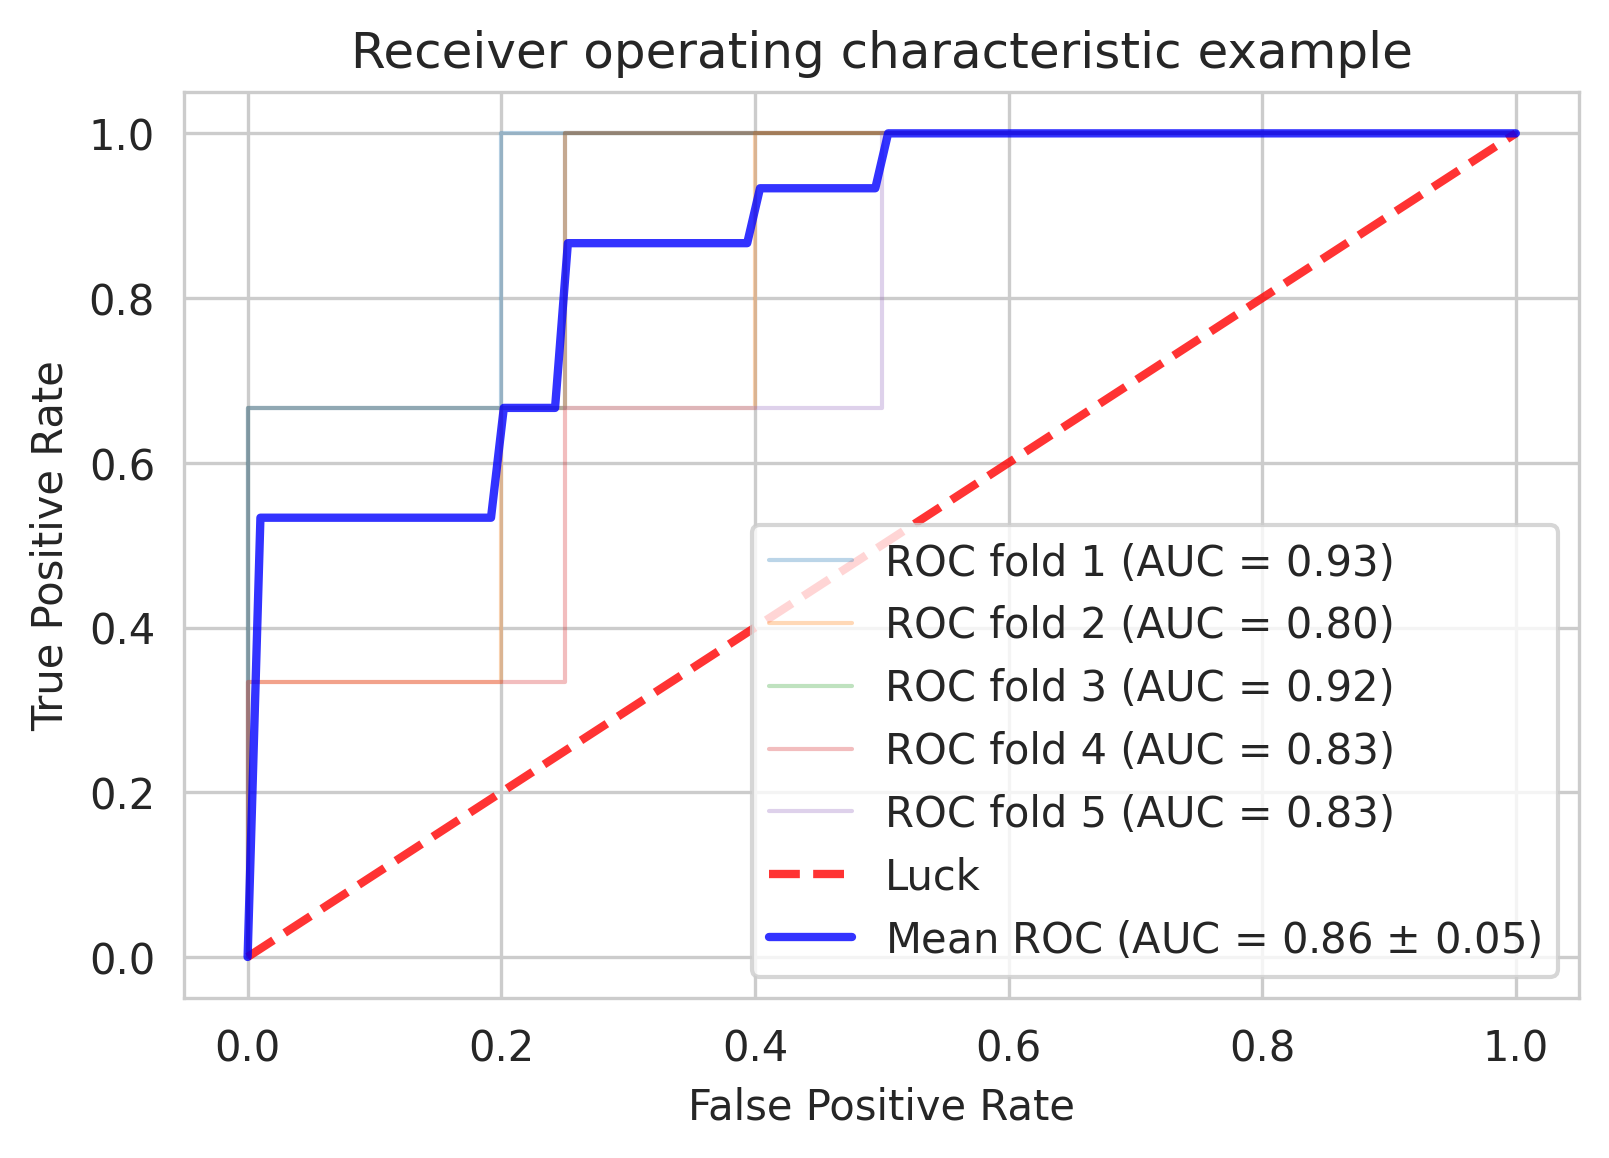

In [33]:
# Calculate 5 time mean accuracy in nested validation

plt.figure(dpi=300)
hyper_parmeters = {}

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (inner_train_index, inner_val_index) in enumerate(splitter.split(x_train, y_train)):
    X_inner_train = x_train[inner_train_index]
    y_inner_train = y_train[inner_train_index]
    X_inner_val = x_train[inner_val_index]
    y_inner_val = y_train[inner_val_index]
    #finde best hyper parameters use inner split
    clf.fit(X_inner_train, y_inner_train)
    inner_bst_model = clf.best_estimator_
    
    #Save hyper parameters
    hyper_parmeters['fold_{}'.format(i+1)] = inner_bst_model.get_params()
    probas_ =inner_bst_model.predict_proba(X_inner_val)
    fpr, tpr, thresholds = roc_curve(y_inner_val, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
hyper_parmeters

{'fold_1': {'C': 1,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': -1,
  'probability': True,
  'random_state': 0,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 'fold_2': {'C': 500,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': -1,
  'probability': True,
  'random_state': 0,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 'fold_3': {'C': 500,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 0.0001,
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': True,
  'random_state': 0,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 'fold_4': {'C': 1000,
  'break_ties': False,
  '

In [35]:
hyper_parmeters['fold_3']

{'C': 500,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
X_train, Y_train = dfT2[T2_common_colums], dfT2 ["type"]
X_realtest=dfT2_test[T2_common_colums]
Y_realtest=dfT2_test["type"]
    
model = inner_bst_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
    
probas_ = model.fit(X_train, Y_train)
pred_realtest=model.predict(X_realtest)
accuracy_realtest=accuracy_score(Y_realtest,pred_realtest)
print(accuracy_realtest)
cm = confusion_matrix(Y_realtest, pred_realtest)
print(cm)

0.4
[[3 2]
 [4 1]]


In [37]:
type(inner_bst_model)

sklearn.svm._classes.SVC

In [38]:
pred_realtest

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [39]:
Y_realtest

Dnum
35      0
36      0
37      0
38      0
39      0
1025    1
1026    1
1027    1
1028    1
1029    1
Name: type, dtype: int64

# logistic regression

In [40]:
tuned_parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [41]:
clf = GridSearchCV(
    LogisticRegression(random_state=0), # 識別器
    tuned_parameters,# 最適化したいパラメータセット 
    cv=2, # 交差検定の回数
    scoring="accuracy") # モデルの評価関数の指定

In [42]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
print(splitter)

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)


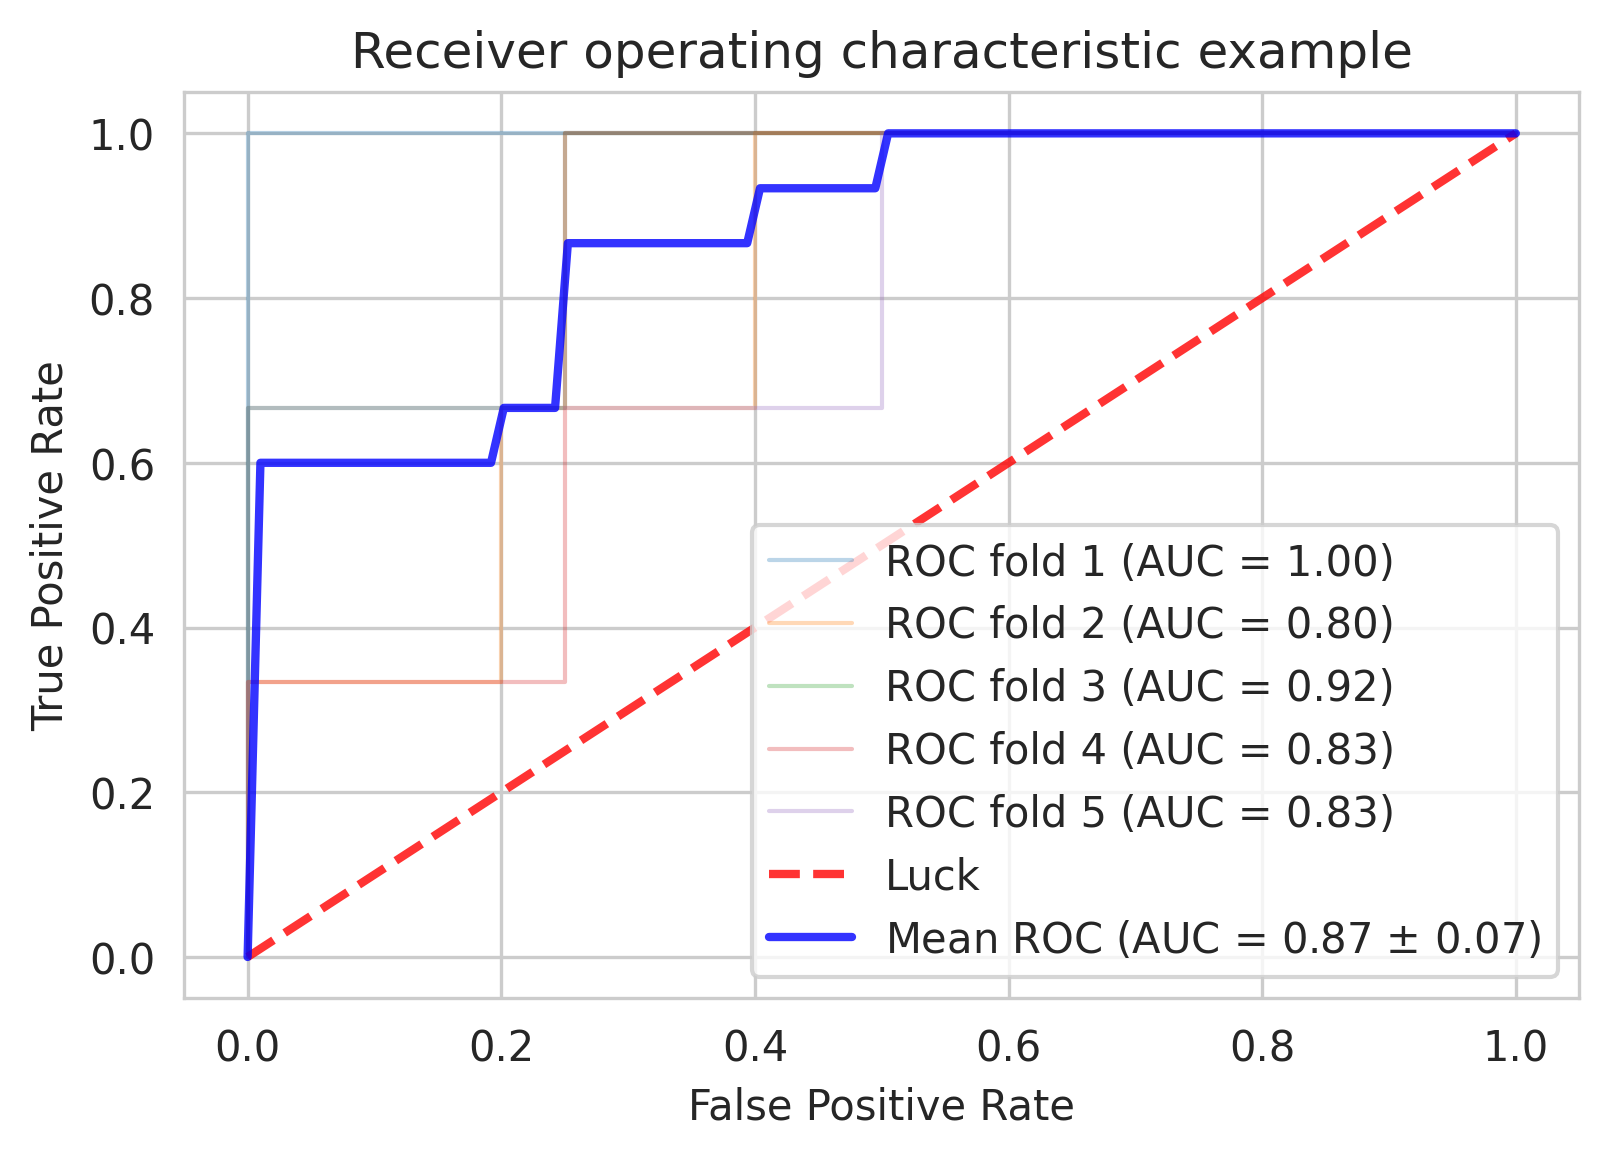

In [43]:
# Calculate 5 time mean accuracy
plt.figure(dpi=300)
hyper_parmeters = {}
#rupeで使うやつ
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for i, (inner_train_index, inner_val_index) in enumerate(splitter.split(x_train, y_train)):
    X_inner_train = x_train[inner_train_index]
    y_inner_train = y_train[inner_train_index]
    X_inner_val = x_train[inner_val_index]
    y_inner_val = y_train[inner_val_index]
    #finde best hyper parameters use inner split
    clf.fit(X_inner_train, y_inner_train)
    inner_bst_model = clf.best_estimator_
    
    #Save hyper parameters
    hyper_parmeters['fold_{}'.format(i+1)] = inner_bst_model.get_params()
    probas_ =inner_bst_model.predict_proba(X_inner_val)
    fpr, tpr, thresholds = roc_curve(y_inner_val, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
    
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
hyper_parmeters

{'fold_1': {'C': 10,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 0,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'fold_2': {'C': 100,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 0,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'fold_3': {'C': 1,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 0,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'fold_4': {'C': 1,
  'class_weight': None,
  'dual': False,


In [45]:
hyper_parmeters['fold_3']

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [46]:
X_train, Y_train = dfT2[T2_common_colums], dfT2 ["type"]
X_realtest=dfT2_test[T2_common_colums]
Y_realtest=dfT2_test["type"]
    
model = inner_bst_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
    
probas_ = model.fit(X_train, Y_train)
pred_realtest=model.predict(X_realtest)
accuracy_realtest=accuracy_score(Y_realtest,pred_realtest)
print(accuracy_realtest)
cm = confusion_matrix(Y_realtest, pred_realtest)
print(cm)

0.5
[[3 2]
 [3 2]]


In [47]:
type(inner_bst_model)

sklearn.linear_model._logistic.LogisticRegression

In [48]:
pred_realtest

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [49]:
Y_realtest

Dnum
35      0
36      0
37      0
38      0
39      0
1025    1
1026    1
1027    1
1028    1
1029    1
Name: type, dtype: int64